# Vectorized Backtest

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [190]:
sns.set_style('whitegrid')
np.random.seed(42)

# settings iniciales

In [191]:
#periodo target. 1 implica que queremos predecir 1 periodo siguiente. (una semana en caso de datos semanales)
periodo_target=1 
PREDICTIONS_STORE = Path("data/prueba_predictions.h5")
DATA_STORE = 'data/assets.h5'

N_BEST_MODELS = 1


## Load Data

### Return Predictions

In [192]:
# Lee el archivo hdf
store = pd.HDFStore(PREDICTIONS_STORE)

# Obtiene las claves
keys = store.keys()

# Cierra el archivo hdf
store.close()

# Imprime las claves
print(keys)

['/lgb/train/01', '/lgb/test/01']


In [193]:
#tomamos los resultados de las 10 mejores configuraciones de los predictores
predictions = pd.concat([pd.read_hdf(PREDICTIONS_STORE, 'lgb/train/01'),
                        pd.read_hdf(PREDICTIONS_STORE, 'lgb/test/01').drop('y_test', axis=1)])

#tomamos la media
predictions = (predictions.loc[~predictions.index.duplicated()]#si se duplican indices tomara los del train, ose los primeros
                   .iloc[:, :N_BEST_MODELS]
                   .mean(1)
                   .sort_index()
                   .dropna()
                  .to_frame('prediction'))
tickers = predictions.index.get_level_values('ticker').unique().tolist()#modificado ticker por symbol


In [194]:
datos_train=(pd.read_hdf(PREDICTIONS_STORE, 'lgb/train/01'))
datos_test=pd.read_hdf(PREDICTIONS_STORE, 'lgb/test/01')

In [195]:
#fin del train
datos_train.sort_index().loc['XLY'].tail(1)

,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2019-12-29,-0.413545,-0.345807,0.075148,0.075148,0.075148,-0.088818,0.07759,0.07759,0.07759,-0.101128


In [196]:
#comienzo del test
datos_test.sort_index().loc['XLY'].head(1)

,y_test,0
date,,
2020-02-23,-0.365664,0.399413


In [197]:
datos_test.loc['XLY'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2024-12-29 to 2020-02-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_test  254 non-null    float64
 1   0       254 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [198]:
predictions

prediction
ticker date                  
IYR    2011-01-16   -0.562080
       2011-01-23    0.019360
       2011-01-30   -0.190542
       2011-02-06    0.230446
       2011-02-13    0.080069
...                       ...
XLY    2024-12-01    0.206781
       2024-12-08   -0.306839
       2024-12-15    0.851389
       2024-12-22    0.692288
       2024-12-29   -0.217535

[7942 rows x 1 columns]

In [199]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7942 entries, ('IYR', Timestamp('2011-01-16 00:00:00')) to ('XLY', Timestamp('2024-12-29 00:00:00'))
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prediction  7942 non-null   float64
dtypes: float64(1)
memory usage: 128.3+ KB


In [200]:
# assets = bundle.asset_finder.lookup_symbols(tickers, as_of_date=None)

predicciones=(predictions
            .unstack('ticker')
            .prediction)


In [201]:
predicciones

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,-0.562080,0.395565,-0.043182,-0.446899,-0.401681,-0.390721,-0.107966,0.151044,0.176677,0.024757,-0.232083
2011-01-23,0.019360,-0.253491,0.369790,0.615593,-0.156424,0.359904,-0.535656,0.261476,-0.217694,-0.266867,0.335462
2011-01-30,-0.190542,-0.181850,0.114480,0.229627,-0.201103,0.270109,-0.064704,-0.450900,0.270280,-0.525461,-0.283065
2011-02-06,0.230446,-0.672137,0.513431,0.121753,-0.576774,-0.023072,-0.297386,0.119039,-0.319533,-0.255941,-0.118125
2011-02-13,0.080069,0.247064,0.390173,0.611728,0.718100,0.023622,-0.025033,0.306023,0.004237,-0.019214,-0.117969
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,-0.354269,-0.473323,0.052175,0.395654,-0.623279,0.282029,0.446166,-0.308197,-0.222433,0.165831,0.206781
2024-12-08,-0.251304,-0.203575,0.114120,-0.250232,0.503591,0.111719,-0.313328,-0.331909,-0.161859,-0.353661,-0.306839
2024-12-15,-0.441474,0.115214,-0.476993,-0.565190,0.294072,0.020999,1.140418,-0.815800,-0.348279,-0.782917,0.851389


In [202]:
predicciones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722 entries, 2011-01-16 to 2024-12-29
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IYR     722 non-null    float64
 1   VOX     722 non-null    float64
 2   XLB     722 non-null    float64
 3   XLE     722 non-null    float64
 4   XLF     722 non-null    float64
 5   XLI     722 non-null    float64
 6   XLK     722 non-null    float64
 7   XLP     722 non-null    float64
 8   XLU     722 non-null    float64
 9   XLV     722 non-null    float64
 10  XLY     722 non-null    float64
dtypes: float64(11)
memory usage: 67.7 KB


### SP500 Benchmark

In [203]:
#sp500 = web.DataReader('SP500', 'fred', '2014', '2018').pct_change()

In [204]:
#sp500.info()

## Compute Forward Returns

In [205]:
#tomamos los datos

In [206]:
idx = pd.IndexSlice

In [207]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.keys())
    data = (store['data_raw']
            .sort_index()
            .loc[idx[:, :'2024'], :])

['/data_close', '/data_raw', '/engineered_features', '/engineered_features_pca', '/engineered_features_pca_10_trimmed', '/engineered_features_pca_95_trimmed', '/engineered_features_pca_trimmed', '/engineered_features_trimmed']


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13772 entries, ('IYR', Timestamp('2001-01-07 00:00:00')) to ('XLY', Timestamp('2024-12-29 00:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1w   13772 non-null  float64
 1   return_2w   13772 non-null  float64
 2   return_3w   13772 non-null  float64
 3   return_6w   13772 non-null  float64
 4   return_12w  13772 non-null  float64
 5   return_52w  13772 non-null  float64
dtypes: float64(6)
memory usage: 728.9+ KB


In [209]:
#localizamos target_1m para las fechas y tickers de predictions
fwd_returns = (data.loc[idx[predictions.index.get_level_values('ticker').unique(),
               predictions.index.get_level_values('date').unique()],:]
               .sort_index(ascending=False))

In [210]:
fwd_returns

return_1w  return_2w  return_3w  return_6w  return_12w  \
ticker date                                                                 
XLY    2024-12-29   0.024289  -0.002168   0.002385   0.015785    0.014116   
       2024-12-22  -0.027942  -0.008390   0.009815   0.010409    0.010961   
       2024-12-15   0.011555   0.029240   0.025901   0.027522    0.015116   
       2024-12-08   0.047233   0.033151   0.029364   0.024943    0.015975   
       2024-12-01   0.019257   0.020544   0.011004   0.018191    0.016622   
...                      ...        ...        ...        ...         ...   
IYR    2011-02-13   0.025925   0.017995   0.017497   0.009879    0.008339   
       2011-02-06   0.010126   0.013310   0.008555   0.008332    0.004294   
       2011-01-30   0.016504   0.007771   0.009186   0.009223   -0.000493   
       2011-01-23  -0.000887   0.005547   0.002318   0.005057    0.002084   
       2011-01-16   0.012022   0.003924   0.008108   0.003228    0.000534   

                   return_52w  
ticker date                    
XLY    2024-12-29    0.005225  
       2024-12-22    0.004689  
       2024-12-15    0.005266  
       2024-12-08    0.005704  
       2024-12-01    0.005048  
...                       ...  
IYR    2011-02-13    0.006112  
       2011-02-06    0.005470  
       2011-01-30    0.005337  
       2011-01-23    0.004857  
       2011-01-16    0.004050  

[7942 rows x 6 columns]

In [211]:
#daily_returns = data.open.unstack('ticker').sort_index().pct_change()
#daily_returns.info()

# Definimos period target

In [212]:
#creamos la variable target_{lookahead} mesesm
fwd_returns[f'target_{periodo_target}m'] = data.groupby(level='ticker')[f'return_{periodo_target}w'].shift(-periodo_target)

In [213]:
#se hace la asignación del retorno de un perdio fwd

fwd_returns = fwd_returns[f'target_{periodo_target}m'].unstack('ticker').sort_index()

In [214]:
#eliminamos SPY
#fwd_returns.drop('SPY.US', axis=1, inplace=True)
fwd_returns.head()

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,-0.000887,-0.018470,-0.034021,-0.007785,-0.015550,-0.000278,-0.017195,0.005455,0.006616,0.000311,-0.002637
2011-01-23,0.016504,0.002022,0.008805,0.014408,-0.012758,-0.001950,0.004277,-0.017294,-0.009390,-0.018018,-0.019038
2011-01-30,0.010126,0.022350,0.046813,0.042469,0.022154,0.026514,0.033295,0.011042,0.004739,0.022778,0.029919
2011-02-06,0.025925,0.022013,0.006822,-0.000270,0.028296,0.029092,0.007868,0.009556,0.006289,0.001547,0.035855
2011-02-13,0.004549,-0.009804,0.010038,0.039266,0.005855,0.005020,0.003717,0.007437,-0.002813,0.013280,0.010864


In [215]:

media = fwd_returns.mean(axis=1).shift(1)
media.name = 'mediasec'

## Generate Signals

In [216]:
#predictions = data.predicted.unstack('ticker')
#predictions.info()

In [217]:
#eliminamos SPY si comparamos con benchmark
#predicciones.drop('SPY.US', axis=1, inplace=True)
predicciones

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,-0.562080,0.395565,-0.043182,-0.446899,-0.401681,-0.390721,-0.107966,0.151044,0.176677,0.024757,-0.232083
2011-01-23,0.019360,-0.253491,0.369790,0.615593,-0.156424,0.359904,-0.535656,0.261476,-0.217694,-0.266867,0.335462
2011-01-30,-0.190542,-0.181850,0.114480,0.229627,-0.201103,0.270109,-0.064704,-0.450900,0.270280,-0.525461,-0.283065
2011-02-06,0.230446,-0.672137,0.513431,0.121753,-0.576774,-0.023072,-0.297386,0.119039,-0.319533,-0.255941,-0.118125
2011-02-13,0.080069,0.247064,0.390173,0.611728,0.718100,0.023622,-0.025033,0.306023,0.004237,-0.019214,-0.117969
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,-0.354269,-0.473323,0.052175,0.395654,-0.623279,0.282029,0.446166,-0.308197,-0.222433,0.165831,0.206781
2024-12-08,-0.251304,-0.203575,0.114120,-0.250232,0.503591,0.111719,-0.313328,-0.331909,-0.161859,-0.353661,-0.306839
2024-12-15,-0.441474,0.115214,-0.476993,-0.565190,0.294072,0.020999,1.140418,-0.815800,-0.348279,-0.782917,0.851389


In [218]:
N_LONG = N_SHORT = 3

In [219]:
long_signals = ((predicciones
                .where(predicciones > 0)
                .rank(axis=1, ascending=False, method='first') <= N_LONG)
                .astype(int))
short_signals = ((predicciones
                  .where(predicciones < 0)
                  .rank(axis=1, method='first') <= N_SHORT)
                 .astype(int))

## Compute Portfolio Returns

Calculamos pesos según la predicción

In [220]:
# Multiply long signals by predictions and normalize each row to sum to 1
weights_long = (long_signals.mul(predicciones)
 .div(long_signals.mul(predicciones).sum(axis=1), axis=0)
 .fillna(0))

weights_short = (short_signals.mul(predicciones)
 .div(short_signals.mul(predicciones).sum(axis=1), axis=0)
 .fillna(0))


In [221]:
long_returns = long_signals.mul(fwd_returns).replace(0, np.nan).mean(axis=1).fillna(0)
short_returns = short_signals.mul(-fwd_returns).replace(0, np.nan).mean(axis=1).fillna(0)
strategy = long_returns.add(short_returns).to_frame('Strategy')

In [222]:
long_returns

date
2011-01-16   -0.002133
2011-01-23    0.007088
2011-01-30    0.024574
2011-02-06    0.010825
2011-02-13    0.018386
                ...   
2024-12-01   -0.013537
2024-12-08   -0.022830
2024-12-15   -0.020553
2024-12-22    0.017851
2024-12-29    0.000000
Length: 722, dtype: float64

In [223]:
strategy

,Strategy
date,
2011-01-16,0.005941
2011-01-23,0.010994
2011-01-30,0.003328
2011-02-06,-0.008041
2011-02-13,0.009099
...,...
2024-12-01,-0.010964
2024-12-08,-0.011376
2024-12-15,0.014028


<Axes: ylabel='Frequency'>

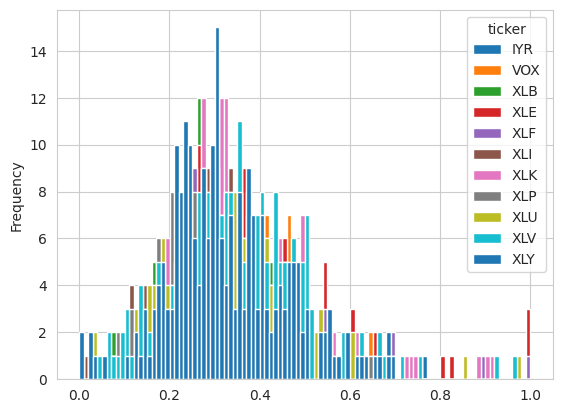

In [224]:
weights_long.replace(0, np.nan).plot.hist(bins = 100, )


In [225]:
long_signals.sum()

ticker
IYR    180
VOX    157
XLB    199
XLE    190
XLF    177
XLI    166
XLK    232
XLP    181
XLU    194
XLV    230
XLY    231
dtype: int64

In [226]:
weights_long

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,-0.000000,0.5469,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.208830,0.244270,0.0,-0.000000
2011-01-23,0.000000,-0.0000,0.274878,0.457592,-0.000000,0.267530,-0.000000,0.000000,-0.000000,-0.0,0.000000
2011-01-30,-0.000000,-0.0000,0.000000,0.298211,-0.000000,0.350783,-0.000000,-0.000000,0.351006,-0.0,-0.000000
2011-02-06,0.266217,-0.0000,0.593130,0.140653,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.0,-0.000000
2011-02-13,0.000000,0.0000,0.226845,0.355656,0.417500,0.000000,-0.000000,0.000000,0.000000,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,-0.000000,-0.0000,0.000000,0.352053,-0.000000,0.250949,0.396998,-0.000000,-0.000000,0.0,0.000000
2024-12-08,-0.000000,-0.0000,0.156451,-0.000000,0.690389,0.153160,-0.000000,-0.000000,-0.000000,-0.0,-0.000000
2024-12-15,-0.000000,0.0000,-0.000000,-0.000000,0.128647,0.000000,0.498897,-0.000000,-0.000000,-0.0,0.372456


In [227]:
long_weighted_returns = weights_long.mul(fwd_returns).replace(0, np.nan).sum(axis=1).fillna(0)
short_weighted_returns = weights_short.mul(-fwd_returns).replace(0, np.nan).sum(axis=1).fillna(0)
strategy_weighted = long_weighted_returns.add(short_weighted_returns).to_frame('Strategy Weighted')
strategy_weighted

,Strategy Weighted
date,
2011-01-16,-0.000099
2011-01-23,0.010390
2011-01-30,0.003448
2011-02-06,-0.010211
2011-02-13,0.008639
...,...
2024-12-01,-0.008213
2024-12-08,-0.007977
2024-12-15,0.012664


In [228]:
short_signals.loc['2019':].describe()

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.359477,0.333333,0.248366,0.421569,0.238562,0.199346,0.163399,0.267974,0.339869,0.205882,0.176471
std,0.480633,0.472177,0.432773,0.494619,0.426903,0.400163,0.370335,0.443629,0.474440,0.405007,0.381844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
long_signals.loc['2019':].describe()

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.163399,0.209150,0.267974,0.212418,0.287582,0.241830,0.437908,0.251634,0.222222,0.320261,0.349673
std,0.370335,0.407368,0.443629,0.409689,0.453376,0.428893,0.496942,0.434663,0.416421,0.467341,0.477648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
long_signals.loc['2019':].sum()

ticker
IYR     50
VOX     64
XLB     82
XLE     65
XLF     88
XLI     74
XLK    134
XLP     77
XLU     68
XLV     98
XLY    107
dtype: int64

In [231]:
long_signals.sum().sum()

2137

In [232]:
predicciones

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,-0.562080,0.395565,-0.043182,-0.446899,-0.401681,-0.390721,-0.107966,0.151044,0.176677,0.024757,-0.232083
2011-01-23,0.019360,-0.253491,0.369790,0.615593,-0.156424,0.359904,-0.535656,0.261476,-0.217694,-0.266867,0.335462
2011-01-30,-0.190542,-0.181850,0.114480,0.229627,-0.201103,0.270109,-0.064704,-0.450900,0.270280,-0.525461,-0.283065
2011-02-06,0.230446,-0.672137,0.513431,0.121753,-0.576774,-0.023072,-0.297386,0.119039,-0.319533,-0.255941,-0.118125
2011-02-13,0.080069,0.247064,0.390173,0.611728,0.718100,0.023622,-0.025033,0.306023,0.004237,-0.019214,-0.117969
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,-0.354269,-0.473323,0.052175,0.395654,-0.623279,0.282029,0.446166,-0.308197,-0.222433,0.165831,0.206781
2024-12-08,-0.251304,-0.203575,0.114120,-0.250232,0.503591,0.111719,-0.313328,-0.331909,-0.161859,-0.353661,-0.306839
2024-12-15,-0.441474,0.115214,-0.476993,-0.565190,0.294072,0.020999,1.140418,-0.815800,-0.348279,-0.782917,0.851389


In [233]:
short_signals

ticker,IYR,VOX,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,
2011-01-16,1,0,0,1,1,0,0,0,0,0,0
2011-01-23,0,1,0,0,0,0,1,0,0,1,0
2011-01-30,0,0,0,0,0,0,0,1,0,1,1
2011-02-06,0,1,0,0,1,0,0,0,1,0,0
2011-02-13,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,1,1,0,0,1,0,0,0,0,0,0
2024-12-08,0,0,0,0,0,0,1,1,0,1,0
2024-12-15,0,0,0,1,0,0,0,1,0,1,0


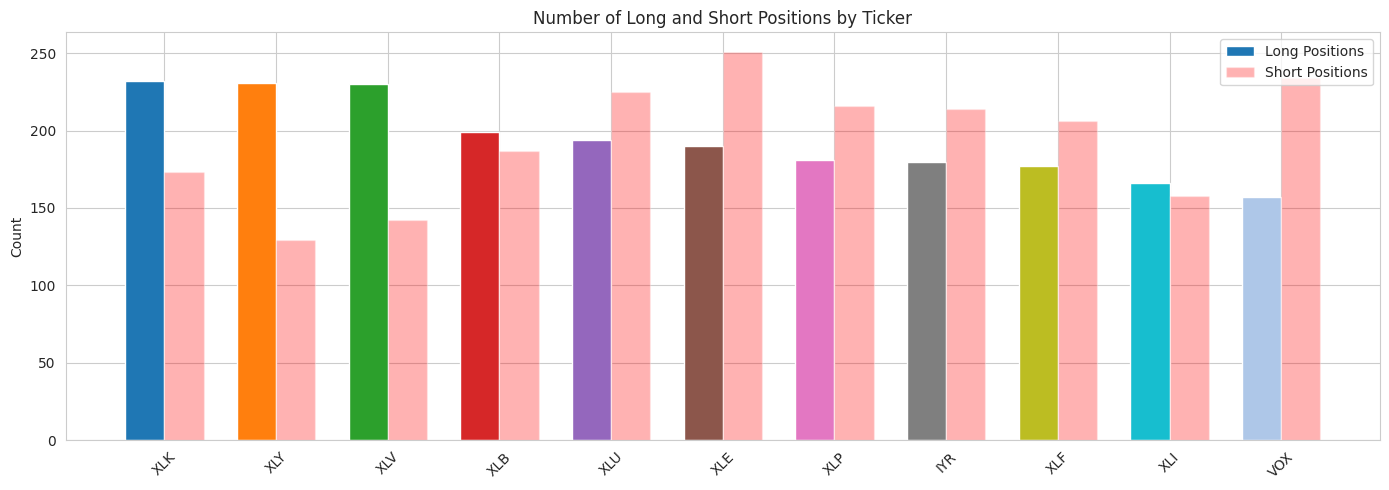

In [234]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']
fig, ax = plt.subplots(figsize=(14,5))

# Ordenar los datos de mayor a menor según los longs
long_sums = long_signals.sum().sort_values(ascending=False)
short_sums = short_signals[long_sums.index].sum()

# Crear un índice para las posiciones de las barras
x = np.arange(len(long_sums))
width = 0.35  # Ancho de las barras

# Graficar barras largas y cortas una al lado de la otra
ax.bar(x - width/2, long_sums, width, color=colors, label='Long Positions')
ax.bar(x + width/2, short_sums, width, color='red', alpha=0.3, label='Short Positions')

plt.title('Number of Long and Short Positions by Ticker')
plt.ylabel('Count')
plt.xticks(x, long_sums.index, rotation=45)
plt.legend()
plt.tight_layout()


## Plot results

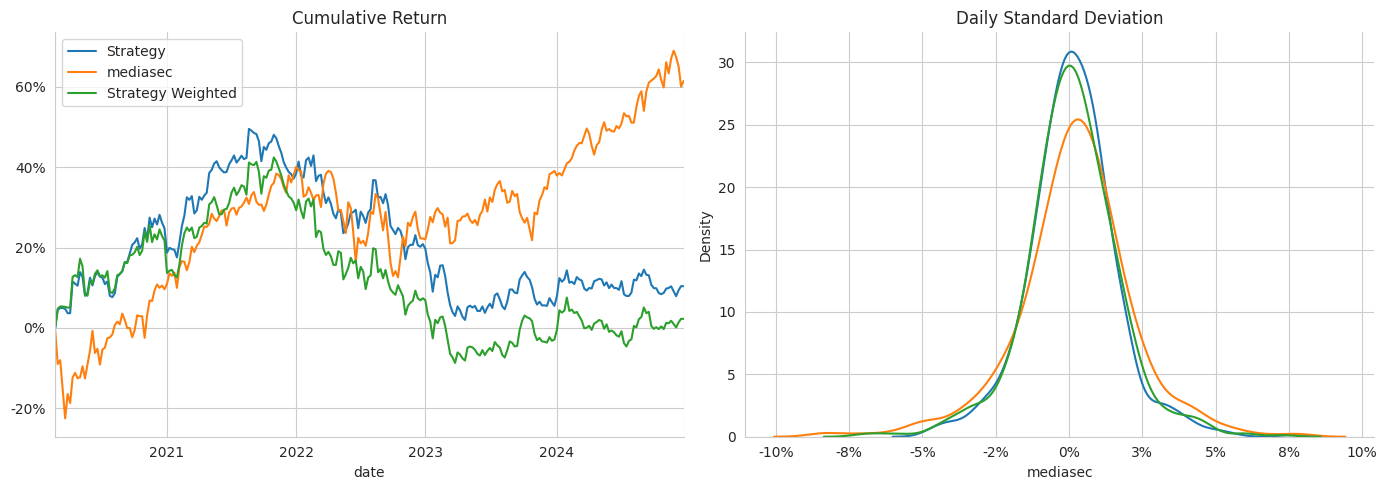

In [235]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy.loc['2020':].join(media).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
#strategy.join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
strategy_weighted.loc['2020':].add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(media, ax=axes[1], hist=False, label='media')
sns.distplot(strategy_weighted.dropna(), ax=axes[1], hist=False, label='Strategy Weighted')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

sns.despine()
fig.tight_layout();

In [236]:
res = strategy.join(media).dropna()

In [237]:
res.std()

Strategy    0.014938
mediasec    0.020016
dtype: float64

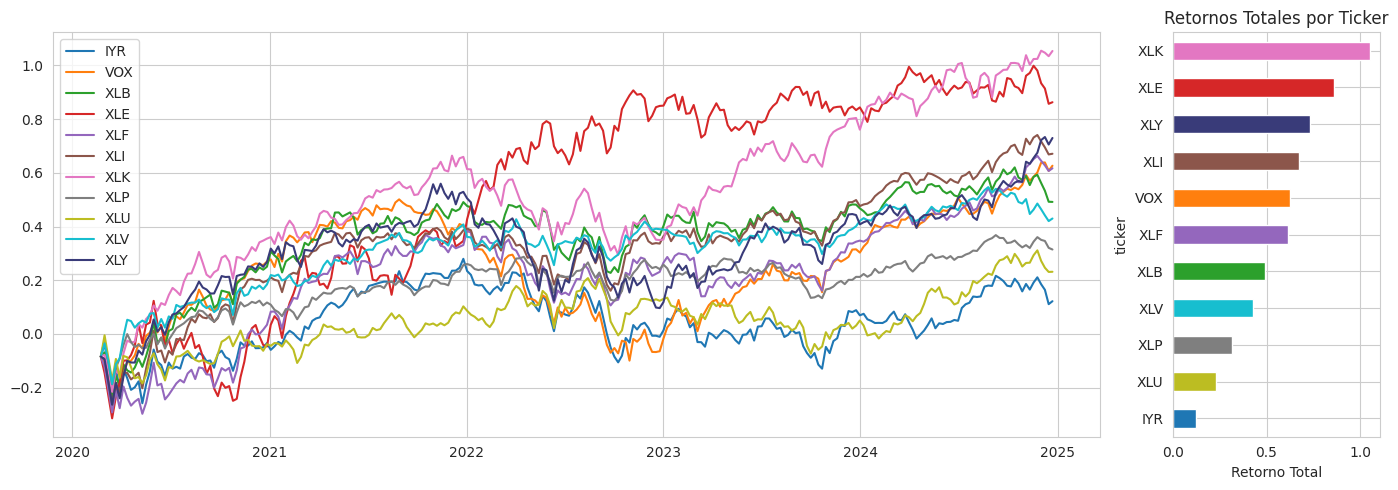

In [238]:
# fwd_returns.loc['2020':].cumsum().plot(figsize=(14,5))
# Crear figura con dos subplots
# plt.figure(figsize=(14,5))

# Subplot izquierdo - gráfico de retornos acumulados
# plt.subplot(121)
# Crear figura con GridSpec para controlar el ancho relativo de los subplots
fig = plt.figure(figsize=(14,5))
gs = fig.add_gridspec(1, 5)  # 5 columnas en total
ax1 = fig.add_subplot(gs[0, :4])  # Primer subplot ocupa 4 columnas
ax2 = fig.add_subplot(gs[0, 4])   # Segundo subplot ocupa 1 columna

# Definir colores para cada ticker
colors = {'IYR': '#1f77b4', 'VOX': '#ff7f0e', 'XLB': '#2ca02c', 
          'XLE': '#d62728', 'XLF': '#9467bd', 'XLI': '#8c564b',
          'XLK': '#e377c2', 'XLP': '#7f7f7f', 'XLU': '#bcbd22', 
          'XLV': '#17becf', 'XLY': '#393b79'}

# Gráfico de retornos acumulados con colores personalizados
for ticker in fwd_returns.columns:
    data = fwd_returns.loc['2020':, ticker].cumsum()
    ax1.plot(data.index, data.values, label=ticker, color=colors[ticker])
ax1.legend()

# Gráfico de barras horizontales con los mismos colores
returns_by_ticker = fwd_returns.loc['2020':].sum().sort_values()
returns_by_ticker.plot(kind='barh', ax=ax2, 
                      color=[colors[x] for x in returns_by_ticker.index])

ax2.set_title('Retornos Totales por Ticker')
ax2.set_xlabel('Retorno Total')
plt.tight_layout()


solo largos

In [239]:
#sólo largos
strategy_long = long_returns.to_frame('Strategy')
strategy_long_weighted = long_weighted_returns.to_frame('Strategy Weighted')

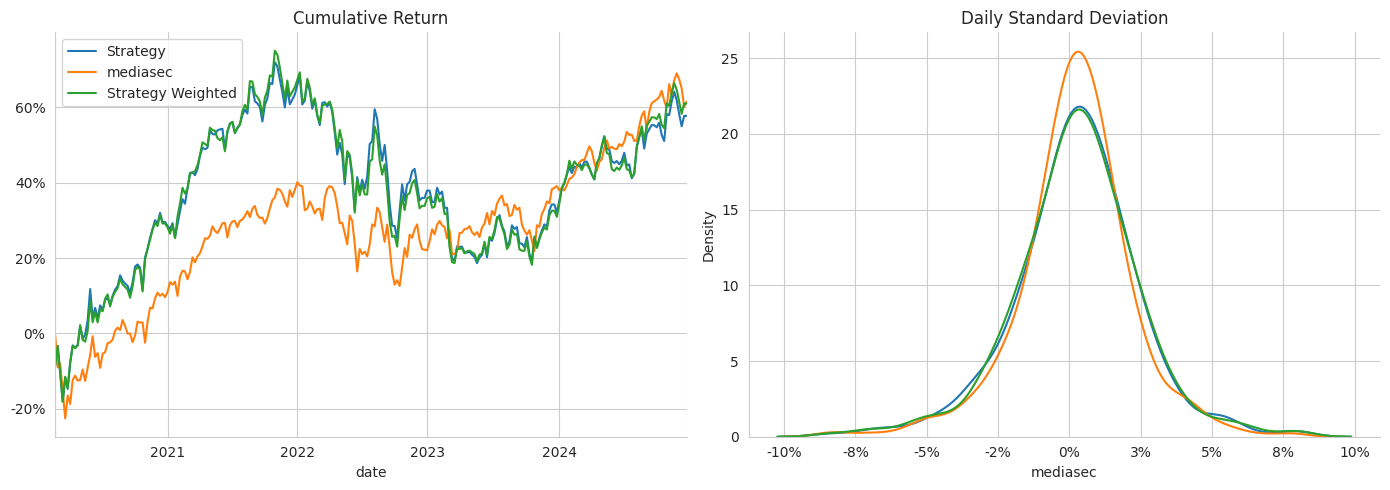

In [240]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy_long.loc['2020':].join(media).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
strategy_long_weighted.loc['2020':].add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy_long.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(media, ax=axes[1], hist=False, label='media')
sns.distplot(strategy_long_weighted.dropna(), ax=axes[1], hist=False, label='Strategy Weighted')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

sns.despine()
fig.tight_layout();

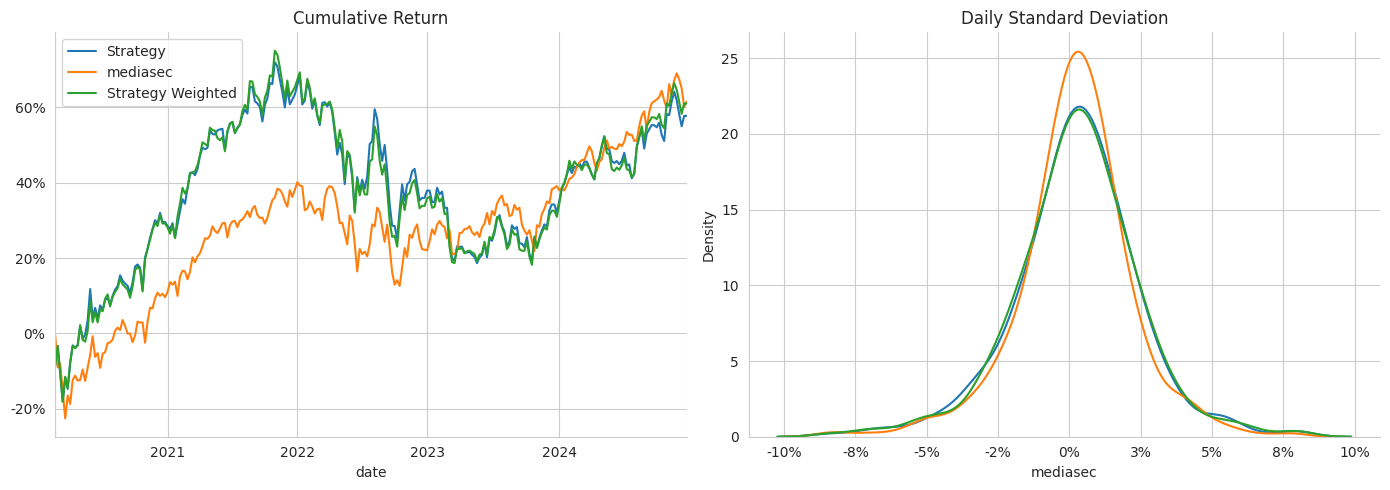

In [241]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy_long.loc['2020':].join(media).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
strategy_long_weighted.loc['2020':].add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy_long.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(media, ax=axes[1], hist=False, label='media')
sns.distplot(strategy_long_weighted.dropna(), ax=axes[1], hist=False, label='Strategy Weighted')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

sns.despine()
fig.tight_layout();

In [242]:
print("Fecha mínima:", strategy_long.index.min())
print("Fecha máxima:", strategy_long.index.max())

Fecha mínima: 2011-01-16 00:00:00
Fecha máxima: 2024-12-29 00:00:00


solo cortos

In [243]:
#sólo CORTOS
strategy_short = short_returns.to_frame('Strategy')
strategy_short_weighted = short_weighted_returns.to_frame('Strategy Weighted')

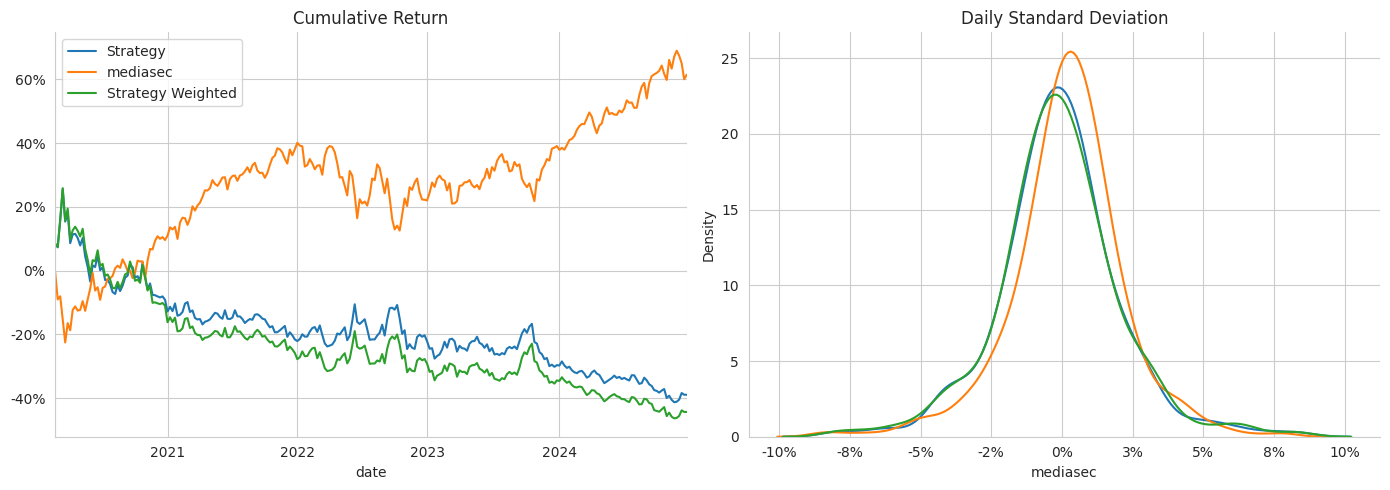

In [244]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy_short.loc['2020':].join(media).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
strategy_short_weighted.loc['2020':].add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy_short.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(media, ax=axes[1], hist=False, label='media')
sns.distplot(strategy_short_weighted.dropna(), ax=axes[1], hist=False, label='Strategy Weighted')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();